In [42]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from geopy.distance import geodesic


from utils import *

datasets_folder = './datasets'
starting_date = datetime(2019,1,1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ciao


In [2]:
traffic_folder = os.path.join(datasets_folder,'traffic')

readings_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'readings'), sep=';')
accuracies_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'accuracies'), sep=';')

display(readings_df.head(3))
display(accuracies_df.head(3))

Merged 6 CSV files
Merged 6 CSV files


,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,Giorno della settimana,giorno settimana
0,2019-01-01,0.127 1.4 2 1,120,142,119,70,59,31,19,38,...,A,318.0,S,170.0,11.347424,44.500815,"44.5008152038968, 11.3474244254298",15.0,Martedì,NaN
1,2019-01-01,0.127 1.12 8 1,59,68,72,46,29,8,11,19,...,A,316.0,N,350.0,11.338970,44.495251,"44.4952505129043, 11.338970003537",2.0,Martedì,NaN
2,2019-01-01,0.127 1.15 6 1,37,31,33,27,13,8,15,16,...,A,324.0,S,168.0,11.343443,44.490027,"44.4900271601578, 11.3434427397635",7.0,Martedì,NaN


,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,14:00-15:00,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00
0,2019-01-14,4.30 4.96 4 1,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
1,2019-01-14,4.31 4.29 6 1,100%,100%,100%,95%,58%,87%,100%,100%,...,83%,91%,100%,100%,91%,79%,95%,87%,95%,100%
2,2019-01-14,4.31 4.39 4 1,100%,100%,100%,100%,66%,83%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


Let's look for not informative columns

In [3]:
print(readings_df.columns)

Index(['data', 'codice spira', '00:00-01:00', '01:00-02:00', '02:00-03:00',
       '03:00-04:00', '04:00-05:00', '05:00-06:00', '06:00-07:00',
       '07:00-08:00', '08:00-09:00', '09:00-10:00', '10:00-11:00',
       '11:00-12:00', '12:00-13:00', '13:00-14:00', '14:00-15:00',
       '15:00-16:00', '16:00-17:00', '17:00-18:00', '18:00-19:00',
       '19:00-20:00', '20:00-21:00', '21:00-22:00', '22:00-23:00',
       '23:00-24:00', 'id_uni', 'Livello', 'tipologia', 'codice',
       'codice arco', 'codice via', 'Nome via', 'Nodo da', 'Nodo a',
       'ordinanza', 'stato', 'codimpsem', 'direzione', 'angolo', 'longitudine',
       'latitudine', 'geopoint', 'ID_univoco_stazione_spira',
       'Giorno della settimana', 'giorno settimana'],
      dtype='object')


We drop a bunch of them

In [4]:
readings_df = readings_df.drop(columns=[
    'id_uni',
    'Livello',
    'tipologia',
    'codice',
    'codice arco',
    'codice via',
    'Nome via',
    'Nodo da',
    'Nodo a',
    'ordinanza',
    'stato',
    'codimpsem',
    'direzione',
    'angolo',
    'longitudine',
    'latitudine',
    'ID_univoco_stazione_spira',
    'Giorno della settimana',
    'giorno settimana'
])

In [23]:
readings_df = readings_df.dropna()
readings_df

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,geopoint
0,2019-01-01,0.127 1.4 2 1,120,142,119,70,59,31,19,38,...,305,292,311,222,161,116,79,67,57,"44.5008152038968, 11.3474244254298"
1,2019-01-01,0.127 1.12 8 1,59,68,72,46,29,8,11,19,...,68,85,101,55,81,64,50,36,27,"44.4952505129043, 11.338970003537"
2,2019-01-01,0.127 1.15 6 1,37,31,33,27,13,8,15,16,...,33,35,34,45,34,49,25,28,14,"44.4900271601578, 11.3434427397635"
3,2019-01-01,0.127 1.18 1 1,22,23,20,16,14,22,34,35,...,41,46,44,51,54,53,27,17,20,"44.4992226472054, 11.338564528943"
4,2019-01-01,0.127 1.18 2 1,119,190,185,130,62,66,47,50,...,150,176,214,158,155,204,119,114,70,"44.4992331807033, 11.3385147346639"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788560,2024-11-30,4.91 4.36 8 1,213,131,87,52,33,51,96,217,...,531,557,617,633,581,463,259,227,288,"44.4785683027768, 11.3804873332989"
1788561,2024-11-30,4.93 4.92 6 1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"44.4843292671686, 11.3685493809408"
1788562,2024-11-30,4.96 4.92 4 1,75,51,34,12,13,32,50,170,...,241,296,273,245,277,205,156,130,128,"44.4829011144397, 11.371762568121"
1788563,2024-11-30,4.98 4.98 3 1,56,34,19,11,10,20,45,66,...,176,168,189,179,161,102,60,55,81,"44.4689700816957, 11.3852604232066"


## Accuracies

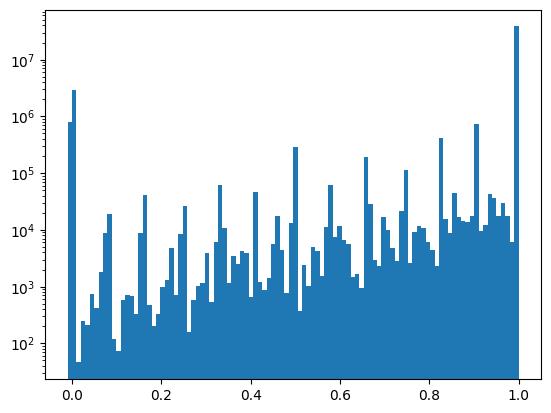

In [6]:
accuracies_df = convert_percentage_to_number(accuracies_df)
v,c=np.unique(np.array(accuracies_df[accuracies_df.columns[2:]]), return_counts=True)
unique_values_array = np.array([v, c]).T
np.set_printoptions(suppress=True)
a=unique_values_array[np.argsort(unique_values_array[:, 0])]
plt.yscale('log')
plt.hist(a[:, 0], bins=len(a[:, 0]), weights=a[:, 1])
plt.show()

oh damn there are -0.01! lets map them to 0

In [7]:
# Define the function to apply
def map_values(x):
    if x == -0.01:
        return 0
    return x

# Apply the function to every item in the dataframe
accuracies_df = accuracies_df.map(map_values)

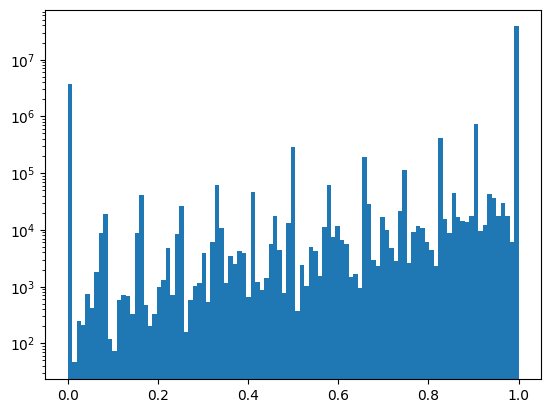

In [8]:
v,c=np.unique(np.array(accuracies_df[accuracies_df.columns[2:]]), return_counts=True)
unique_values_array = np.array([v, c]).T
np.set_printoptions(suppress=True)
a=unique_values_array[np.argsort(unique_values_array[:, 0])]
plt.yscale('log')
plt.hist(a[:, 0], bins=len(a[:, 0]), weights=a[:, 1])
plt.show()


In [41]:
common_cols = readings_df.columns.intersection(accuracies_df.columns).tolist()

accurate_traffic_df = apply_accuracy_df(readings_df[common_cols],accuracies_df[common_cols],max_multiplier=15, half_multiplier=2).reset_index(drop=True)
readings_df = readings_df.reset_index(drop=True)
for col in list(set(readings_df.columns) - set(common_cols)): # add back readings columns
    accurate_traffic_df[col] = readings_df[col]

In [21]:
accurate_traffic_df

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,geopoint
0,2019-01-01,0.127 1.4 2 1,120,142,119,70,59,31,19,38,...,305,292,311,222,161,116,79,67,57,"44.5008152038968, 11.3474244254298"
1,2019-01-01,0.127 1.12 8 1,59,68,72,46,29,8,11,19,...,68,85,101,55,81,64,50,36,27,"44.4952505129043, 11.338970003537"
2,2019-01-01,0.127 1.15 6 1,37,31,33,27,13,8,15,19,...,33,35,34,45,34,49,25,28,14,"44.4900271601578, 11.3434427397635"
3,2019-01-01,0.127 1.18 1 1,22,23,20,16,14,24,34,35,...,41,46,44,51,54,53,27,17,20,"44.4992226472054, 11.338564528943"
4,2019-01-01,0.127 1.18 2 1,119,190,185,130,62,72,47,50,...,150,176,214,158,155,204,119,114,70,"44.4992331807033, 11.3385147346639"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785118,2024-11-30,4.91 4.36 8 1,213,131,87,52,33,51,96,217,...,531,557,617,633,581,463,259,227,288,"44.4768136065643, 11.3587719945652"
1785119,2024-11-30,4.93 4.92 6 1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"44.4694018980083, 11.3854132162291"
1785120,2024-11-30,4.96 4.92 4 1,75,51,34,12,13,32,50,170,...,241,296,273,245,277,205,156,130,128,"44.4996257932061, 11.3506167328376"
1785121,2024-11-30,4.98 4.98 3 1,56,34,19,11,10,20,45,66,...,176,168,189,179,161,102,60,55,81,"44.4997826599602, 11.3503575936824"


## Locality of the readings

In [52]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert to radians
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # Distance in km

def search_close_readings(df, center, radius):
    center_lat, center_lon = map(float, center.split(','))
    
    # Extract lat/lon values from 'geopoint' column
    lat_lon = np.array([list(map(float, gp.split(','))) for gp in df['geopoint']])
    
    # Compute all distances using Haversine formula (vectorized)
    distances = haversine(center_lat, center_lon, lat_lon[:, 0], lat_lon[:, 1])
    
    # Return filtered DataFrame
    return df[distances <= radius]

In [ ]:
giardini_margherita_geopoint = '44.482671138769533,11.35406170088398'
san_felice_geopoint = '44.499059983334519,11.327526717440112'
chiarini_geopoint = '44.499134335170289, 11.285089594971216'

radius = 1 # km

search_close_readings(accurate_traffic_df, giardini_margherita_geopoint, radius)

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,geopoint
0,2019-01-01,0.127 1.4 2 1,120,142,119,70,59,31,19,38,...,305,292,311,222,161,116,79,67,57,"44.5008152038968, 11.3474244254298"
1,2019-01-01,0.127 1.12 8 1,59,68,72,46,29,8,11,19,...,68,85,101,55,81,64,50,36,27,"44.4952505129043, 11.338970003537"
2,2019-01-01,0.127 1.15 6 1,37,31,33,27,13,8,15,19,...,33,35,34,45,34,49,25,28,14,"44.4900271601578, 11.3434427397635"
3,2019-01-01,0.127 1.18 1 1,22,23,20,16,14,24,34,35,...,41,46,44,51,54,53,27,17,20,"44.4992226472054, 11.338564528943"
4,2019-01-01,0.127 1.18 2 1,119,190,185,130,62,72,47,50,...,150,176,214,158,155,204,119,114,70,"44.4992331807033, 11.3385147346639"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785118,2024-11-30,4.91 4.36 8 1,213,131,87,52,33,51,96,217,...,531,557,617,633,581,463,259,227,288,"44.4785683027768, 11.3804873332989"
1785119,2024-11-30,4.93 4.92 6 1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"44.4843292671686, 11.3685493809408"
1785120,2024-11-30,4.96 4.92 4 1,75,51,34,12,13,32,50,170,...,241,296,273,245,277,205,156,130,128,"44.4829011144397, 11.371762568121"
1785121,2024-11-30,4.98 4.98 3 1,56,34,19,11,10,20,45,66,...,176,168,189,179,161,102,60,55,81,"44.4689700816957, 11.3852604232066"
